<a href="https://colab.research.google.com/github/jahnvisikligar/Image-Classification/blob/main/P%26ID_sheet_OCR_and_Symbol_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First, we'll install deps for pdf2image.

In [1]:
!apt-get install poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 8 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.1 [186 kB]
Fetched 186 kB in 0s (451 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 129824 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.1_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.1) ...
Setting up poppler-utils (22.02.0-2ubuntu0.1) ...
Processing triggers for man-db (2.10.2-1) ...


Next, install `pdf2image` itself.

In [2]:
!pip install pdf2image

Download an example PDF file to be converted & displayed below.

Convert and display the example PDF file downloaded above.

In [3]:
!pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.9/813.9 kB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 18.6 MB/s eta 0:00:00


# OCR

In [6]:
from pdf2image import convert_from_path, convert_from_bytes
from IPython.display import display, Image
from pdf2image import convert_from_path
import easyocr
import numpy as np
import PIL
from PIL import ImageDraw

In [5]:
reader = easyocr.Reader(['en'])

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

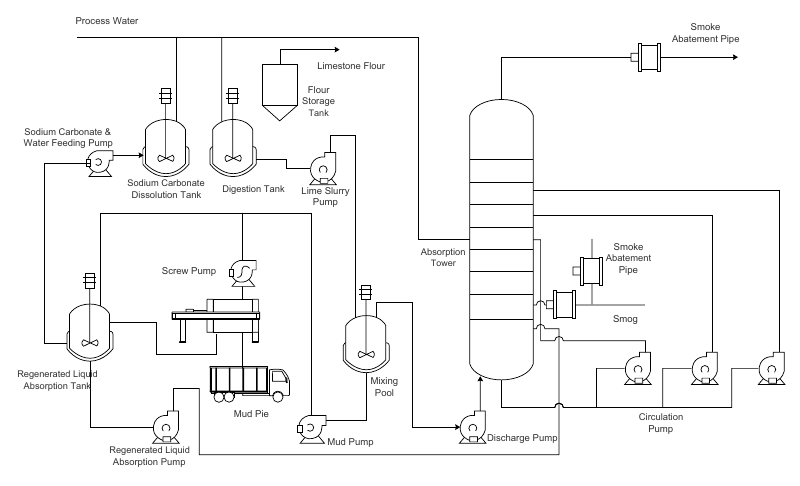

In [7]:
images = convert_from_bytes(open('/content/producing-pid.pdf', 'rb').read(), size=800)
display(images[0])

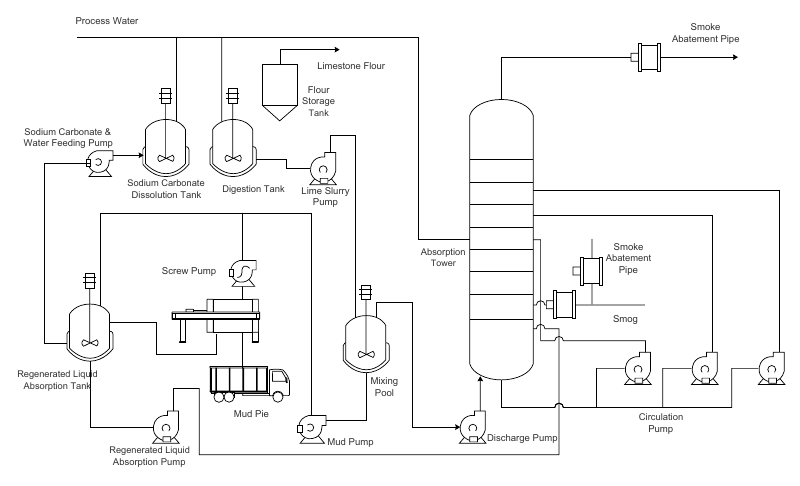

In [8]:
# Save the first image (index 0) to a file
images[0].save('output_image.jpg')

# Display the first image
images[0].show()

In [9]:
bounds = reader.readtext('/content/output_image.jpg', contrast_ths=0.05, adjust_contrast=0.7, add_margin=0.45, width_ths=0.7, decoder='beamsearch')
bounds

[([[70, 12], [144, 12], [144, 30], [70, 30]],
  'Process Water',
  0.503046498176426),
 ([[687, 19], [723, 19], [723, 33], [687, 33]], 'Smoka', 0.9653540915927293),
 ([[669, 31], [741, 31], [741, 45], [669, 45]],
  'Abatement Pipe',
  0.9056607260635),
 ([[313, 59], [389, 59], [389, 73], [313, 73]],
  'Limestone Flour',
  0.9994718743166198),
 ([[305, 83], [333, 83], [333, 97], [305, 97]], 'Flcur', 0.5706274341472533),
 ([[306, 108], [332, 108], [332, 118], [306, 118]],
  'Tank',
  0.9696473479270935),
 ([[20, 124], [106, 124], [106, 142], [20, 142]],
  'Sodaum Carbonate _',
  0.2333633257226778),
 ([[18, 133], [90, 133], [90, 152], [18, 152]],
  'Water Feeding !',
  0.16214285709257006),
 ([[123, 175], [207, 175], [207, 189], [123, 189]],
  'Sodium Carbonate',
  0.5099057779417819),
 ([[127, 187], [205, 187], [205, 201], [127, 201]],
  'Disgcluton Tank',
  0.636374232631985),
 ([[217, 179], [293, 179], [293, 201], [217, 201]],
  'Dgesticn Tank',
  0.5737536575525498),
 ([[297, 183], [

In [10]:
bounds[0][1]

'Process Water'

In [11]:
text=''
for i in range(len(bounds)):
  text = text + bounds[i][1] +'\n'

print(text)

Process Water
Smoka
Abatement Pipe
Limestone Flour
Flcur
Tank
Sodaum Carbonate _
Water Feeding !
Sodium Carbonate
Disgcluton Tank
Dgesticn Tank
Lime
umy
Pump
~Smoke
Absorpton |
Abalement
Toxer
Screw B
Pipe
Regenerated Liqyd
Absorpion Tank
Pool"
Mud Pie
Circulation
> Mud Pump
KDischarge Pump]/
Regenerared Liquid
Absorption Pump
) stornga
1 Pumd
4Punp
Smog
{Muing
Fump



# **Symbol detection**

In [12]:
#downloading labelled dataset
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Ahp72f942hbp1mkRltdE")
project = rf.workspace("jahnvi-sikligar-covuh").project("pid_symbol_detection")
dataset = project.version(1).download("yolov8")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.3 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=30bb53a3ef3ee9530e8baf84ea6cadad14d176661040d53173ebd13142a52e30
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.0
    Uninstalling pyparsing-3.1.0:
      Successfully uninstalled pyparsing-3.1.0
  Attempting uninstall: idna
    Found e

loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.134`, to intall it `pip install ultralytics==8.0.134`.


Extracting Dataset Version Zip to pid_symbol_detection-1 in yolov8:: 100%|██████████| 30/30 [00:00<00:00, 5478.93it/s]


In [13]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 607.6/607.6 kB 6.4 MB/s eta 0:00:00


In [14]:
import os
from ultralytics import YOLO

In [35]:
#loading the model
model=YOLO('yolov8n.yaml')


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

In [38]:
#use the model
model.train(data=os.path.join('/content/pid_symbol_detection-1','data.yaml'), epochs=2)

Ultralytics YOLOv8.0.141 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/pid_symbol_detection-1/data.yaml, epochs=2, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=Fal